In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
!pip install tensorflow-gpu==2.0.0-beta1
!pip install --upgrade keras
import tensorflow as tf


     |████████████████████████████████| 348.9MB 45kB/s 
     |████████████████████████████████| 3.1MB 44.4MB/s 
     |████████████████████████████████| 501kB 61.5MB/s 
     |████████████████████████████████| 378kB 1.7MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=48b685c5dac37920543db6072c7b9e82a80946b023675bd3280d9dffe48acffd
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
# from keras_radam import RAdam    # try

# 1. 讀入 Fashion MNSIT 數據集

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# 看一下shape
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
y_train[0]

9

# 2. 欣賞數據集內容

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


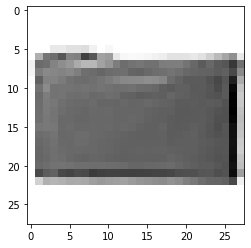

In [0]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

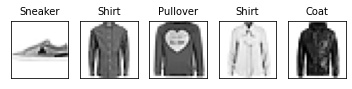

In [0]:
pick = np.random.choice(60000, 5, replace=False)    # 抽出不放回

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [0]:
pick

array([22364, 45959, 38357, 28730, 55321])

## 前處理

In [0]:
# parameters
class_nums = len(class_names)


# flatten and normalize
x_train = x_train.reshape(60000, 784) / 255.
x_test = x_test.reshape(10000, 784) / 255.

x_train_original = x_train.reshape(60000, 28, 28)
x_test_original = x_test.reshape(10000, 28, 28)

# for CNN 
x_train_original = tf.expand_dims(x_train_original, axis=3)
x_test_original = tf.expand_dims(x_test_original, axis=3)


# one-hot y-data
y_train = tf.keras.utils.to_categorical(y_train, class_nums)
y_test = tf.keras.utils.to_categorical(y_test, class_nums)

## Model
- 預計嘗試流程

- 全連接 3 層
    - optimizer(簡單嘗試, 先不考慮動量以及其他)
        - SGD
        - Adam
        - RAdam
    - initializer
        - default 與 uniform在此例差不多
    - which first (BN or dropout?)
        - It doesn't matter.
    - which first ? (BN or Activation function)
        - 
    - early-stop
    - another
        - neurons
            - not yey
        - layers
            - three layers are almost equal four layers
        - batches
        - lr
            - not yey

- CNN model
    - optimizer
    - initializer
    - early-stop
    - maybe data augmentation or transfering learnging


In [0]:
# 簡單包裝讓model輕便一些

def build_model(class_nums=10, input_shape=(784, ),layers=3, dropout=False, bn=False, init='glorot_uniform'):
    model = Sequential()
    neurons = 256
    for i in range(layers-1):
        if i == 0:
            model.add(Dense(neurons, input_shape=input_shape, kernel_initializer=init))
        else:
            model.add(Dense(neurons, use_bias=True, kernel_initializer=init))
        if dropout:
            model.add(Dropout(0.25))
        if bn:
            model.add(BatchNormalization())
        model.add(Activation('relu'))
        if neurons > 32:
            neurons = 256 // 2
    model.add(Dense(class_nums, activation='softmax'))
    
    # show model
    model.summary()
    return model

# 測試一下, BN先還是activate先好?
    - 猜測應該是BN先
        - 因為先把資料標準化再activate比較合理
    - answer:
        - BN先效果比較好!!!

In [0]:
# Activation first

model = Sequential()
model.add(Dense(256, input_shape=(784, )))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(class_nums, activation="softmax")) 

# BN first
model2 = Sequential()
model2.add(Dense(256, input_shape=(784, )))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(class_nums, activation="softmax")) 

# see the model struture
model.summary()

# hyperparameters
batch_size = 50
epochs = 20
lr = 0.01


# train the model
# documentation    :    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

model2.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 236,170
Trainable params: 235,658
Non-trainable params: 512
______________________________________________

## 測試優化器
- 排名
    - 

In [0]:
# Adam is much better than SGD most of time.

# build model
# full-connectected
model_Adam = build_model(dropout=True, bn=True)
model_SGD = build_model(dropout=True, bn=True)
model_RMSprop = build_model(dropout=True, bn=True)

# hyperparameters
batch_size = 50
epochs = 20
lr = 0.01


# train the model
# documentation    :    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_Adam.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_Adam.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

print('==='*20)

model_SGD.compile(optimizer=SGD(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_SGD.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

print('==='*20)

model_RMSprop.compile(optimizer=RMSprop(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_RMSprop.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 256)               1024      
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 128)             

## 測試initilizer變換
    - 排名
        - uniform
        - defalut

In [0]:
model_init_default = build_model(dropout=True, bn=True)
model_init_uniform = build_model(dropout=True, bn=True, init='uniform')

# hyper-parameters
batch_size = 50
epochs = 20
lr = 0.01

model_init_default.compile(optimizer=Adam(lr=lr), loss='mse', metrics=['accuracy'])
model_init_default.fit(x_train, y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, y_test)
                       )
model_init_uniform.compile(optimizer=Adam(lr=lr), loss='mse', metrics=['accuracy'])
model_init_uniform.fit(x_train, y_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, y_test)
                       )

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 128)             

# 此處測試一下Dropout 與 BN 哪個先好?
- Result: 差不多

測試層數增加
- 3層與4層差距不大, 但3層訓練參數少
    - 故此情況，利用3層即可。

In [0]:
# 測試層數參加

model_3 = build_model(layers=3, dropout=True, bn=True)
model_4 = build_model(layers=4, dropout=True, bn=True)

# 超參數
batch_size = 50
epochs = 20
lr = 0.01


# train
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_3.compile(optimizer=Adam(lr=lr), loss='mse', metrics=['accuracy'])
model_3.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

print('==='*20)

model_4.compile(optimizer=Adam(lr=lr), loss='mse', metrics=['accuracy'])
model_4.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024      
_________________________________________________________________
activation_29 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)             

# Batch測試

In [0]:
# hype-parameters
batch_size_50 = 50
batch_size_100 = 100
batch_size_200 = 200

epochs = 15    # 因為太多資料了, 先減少
lr = 0.01


model_50 = build_model(dropout=True, bn=True)
model_100 = build_model(dropout=True, bn=True)
model_200 = build_model(dropout=True, bn=True)

model_50.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_50.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size_50,
             validation_data=(x_test, y_test))

model_100.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_100.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size_100,
             validation_data=(x_test, y_test))

model_200.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
model_200.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size_200,
             validation_data=(x_test, y_test))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 256)               1024      
_________________________________________________________________
activation_42 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 128)             

# CNN 測試

In [0]:
# 超參數
batch_size = 50
epochs = 20
lr = 0.01

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test_original.shape[1:]))   # (60000, 28, 28, 1) CNN需要RGB通道
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer=Adam(learning_rate=lr),
              metrics=['accuracy'],
              )

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)       

In [0]:
# 超參數
batch_size = 50
epochs = 20
lr = 0.01

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test_original.shape[1:]))   # (60000, 28, 28, 1)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_63 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_64 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 13, 13, 64)      

In [0]:
# 超參數
batch_size = 50
epochs = 20
lr = 0.01

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test_original.shape[1:]))   # (60000, 28, 28, 1)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)       

In [0]:
# 超參數
batch_size = 100
epochs = 20
lr = 0.01
decay_rate = 0.1

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test_original.shape[1:], kernel_initializer='uniform'))   # (60000, 28, 28, 1)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='uniform'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_52 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_53 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 13, 13, 64)      

In [0]:
# 超參數
batch_size = 50
epochs = 20
lr = 0.01

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test_original.shape[1:]))   # (60000, 28, 28, 1)
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)       

In [0]:
# 超參數
# 沒有BN: 5s 80us/sample - loss: 0.0038 - accuracy: 0.9765 - val_loss: 0.0117 - val_accuracy: 0.9276
# 有BN: 7s 120us/sample - loss: 0.0040 - accuracy: 0.9747 - val_loss: 0.0110 - val_accuracy: 0.9317
# 有BN+Dense(1024): 8s 129us/sample - loss: 0.0047 - accuracy: 0.9709 - val_loss: 0.0113 - val_accuracy: 0.9329
# BN+512+32: 7s 113us/sample - loss: 0.0044 - accuracy: 0.9722 - val_loss: 0.0110 - val_accuracy: 0.9309
# 多了1x1 CNN: 8s 131us/sample - loss: 0.0041 - accuracy: 0.9740 - val_loss: 0.0118 - val_accuracy: 0.9277
# 比原始還少一層 earlystop在16 : 6s 98us/sample - loss: 0.0062 - accuracy: 0.9594 - val_loss: 0.0124 - val_accuracy: 0.9210

# lr=0.01, 超爛: 7s 123us/sample - loss: 0.0249 - accuracy: 0.8738 - val_loss: 0.0254 - val_accuracy: 0.8718
# lr=0.002, 8s 133us/sample - loss: 0.0051 - accuracy: 0.9683 - val_loss: 0.0109 - val_accuracy: 0.9321
# default還比較好= =

# MaxPooling x3, 原本只有一個: 6s 106us/sample - loss: 0.0152 - accuracy: 0.8974 - val_loss: 0.0158 - val_accuracy: 0.8908

# 原32-32-64
# 32-64-128: 10s 159us/sample - loss: 0.0039 - accuracy: 0.9758 - val_loss: 0.0121 - val_accuracy: 0.9253
# 16-32-64: 7s 120us/sample - loss: 0.0038 - accuracy: 0.9762 - val_loss: 0.0108 - val_accuracy: 0.9322
# 64-128-256: overfitting : 15s 246us/sample - loss: 0.0025 - accuracy: 0.9850 - val_loss: 0.0108 - val_accuracy: 0.9313

batch_size = 100
epochs = 20
lr = 0.01

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',               
                 input_shape=x_test_original.shape[1:]))   # (60000, 28, 28, 1)  # 原filter=32
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))    # 多的
model.add(Conv2D(128, (3, 3)))                  # 原32
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# # 多的~~~
# model.add(Conv2D(32, (1, 1), padding='same'))     # 修改
# model.add(Activation('relu'))
# model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))     # 修改, 原64
model.add(Activation('relu'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))     # 多的

model.add(Flatten())
model.add(Dense(512))      # 修改
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

# callback
earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=5, 
                          verbose=1
                          )


model.compile(loss='mse',
              optimizer=Adam(),
              metrics=['accuracy']
              )

history = model.fit(x_train_original, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_original, y_test),
                    steps_per_epoch=None,
                    callbacks=[earlystop])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 128)      